# Telecom Churn Prediction

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv
df_churn=pd.read_csv('churn_data.csv')
df_customer=pd.read_csv('customer_data.csv')
df_internet=pd.read_csv('internet_data.csv')

In [3]:
df_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df_internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
#Merging Churn data and customer data with primary key customerID
df=pd.merge(df_churn, df_customer, how='inner', on='customerID')
df=pd.merge(df, df_internet, how='inner', on='customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [9]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
#Visualize null values if any
import klib
klib.missingval_plot(df)

No missing values found in the dataset.


There are no missing values in the data set.

In [11]:
df_columns=df.columns
df_columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [12]:
df_binary_columns=['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
def yes_no(x):
    return x.map({'Yes': 1, 'No': 0})

df[df_binary_columns]= df[df_binary_columns].apply(yes_no)
df.gender=df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### One hot encoding for categorical variables with more than one categories

In [13]:
#one_hot_list=['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines', 'OnlineSecurity','OnlineBackup', 
#               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# for i in one_hot_list:
#     print(i)
#     print(df[i].value_counts())
#     print('--------------------------------------------------------------')

In [14]:
#creating dummies for the above columns:
# dummy1=pd.get_dummies(df[one_hot_list],drop_first=True)
# df=df.drop(one_hot_list, axis=1)

# df=pd.concat([df, dummy1], axis=1)
# df.head()

In [15]:
# df.info()

The variable TotalCharges is of object type. Changing it's data type:

In [16]:
# df.TotalCharges=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [17]:
#Dropping customerID
# df=df.drop('customerID', axis=1)

In [18]:
# df.gender.value_counts()

In [19]:
#Checking for null values again since TotalCharges changed to numeric
# df.isnull().sum()

In [20]:
# df=df[~df.TotalCharges.isnull()==True]

In [21]:
#Checking for outliers:
# df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe(percentiles=[0.0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.0])

#### There are no outliers in the data

### Data Pre-processing for training the model

In [22]:
# df.columns

In [23]:
# y=df.pop('Churn')
# X=df
# print(y.head())
# X.head()

In [24]:
# from sklearn.model_selection import train_test_split
# print(X.shape)
# print(y.shape)
# X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=100, train_size=0.7)
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

### Feature scaling

In [25]:
#The columns 'tenure', 'MonthlyCharges', 'TotalCharges' needs to be scaled.
#Checking whether the data of these variables follows a Gaussian distribution or not.

# plt.figure(figsize=(16,10))
# plt.subplot(1,3,1)
# sns.distplot(df.tenure)
# plt.subplot(1,3,2)
# sns.distplot(df.MonthlyCharges)
# plt.subplot(1,3,3)
# sns.distplot(df.TotalCharges)
# plt.show()

In [26]:
#If the data doesn't follow Gaussian distribution MinMaxScaler(Normalization) must be used. But in the course StandardScaler is used.
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()

# X_train[['tenure', 'MonthlyCharges', 'TotalCharges']]=scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
# X_train.head()

In [27]:
# y_train.head()

In [28]:
#Checking if there is a major bias in Churn in test data
# churn_rate= (y_train.sum())/(y_train.shape[0])
# churn_rate

In [29]:
#Churn rate is 26%

In [30]:
#Checking correlation.
# plt.figure(figsize=(22,16))
# sns.heatmap(df.corr(), annot=True)
# plt.show()

#### As it is visible that while doing one-hot coding, variables with No internet service were given preference over yes or no.Hence accomplishing one-hot cencoding again after commenting from the above part.

In [31]:
one_hot_encoding1=['Contract', 'PaymentMethod', 'InternetService']

for i in one_hot_encoding1:
    print(i)
    print(df[i].value_counts())
    print('--------------------------')

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
--------------------------
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
--------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------------


In [32]:
dummy1=pd.get_dummies(df[one_hot_encoding1], drop_first=True)
df=pd.concat([df, dummy1], axis=1)
#df=df.drop(one_hot_encoding1, axis=1)
df.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,No,No,No,0,0,0,1,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,...,No,No,No,1,0,0,0,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,...,No,No,No,0,0,0,0,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,...,Yes,No,No,1,0,0,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,...,No,No,No,0,0,0,1,0,1,0


In [33]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,sm1], axis=1)

In [34]:
df = df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [35]:
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [37]:
df.TotalCharges=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [38]:
#Dropping customerID
df=df.drop('customerID', axis=1)

In [40]:
#Checking for null values again since TotalCharges changed to numeric
df.isnull().sum()

tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                           0
OnlineBackup_Yes                          0
DeviceProtection_No             

In [41]:
df=df[~df.TotalCharges.isnull()==True]

In [42]:
#Checking for outliers:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe(percentiles=[0.0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.0])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
0%,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000


#### There are no outliers in the data

### Data Pre-processing for training the model

In [43]:
df.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')

In [44]:
y=df.pop('Churn')
X=df
print(y.head())
X.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [45]:
from sklearn.model_selection import train_test_split
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=100, train_size=0.7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7032, 29)
(7032,)
(4922, 29)
(4922,)
(2110, 29)
(2110,)


### Feature scaling

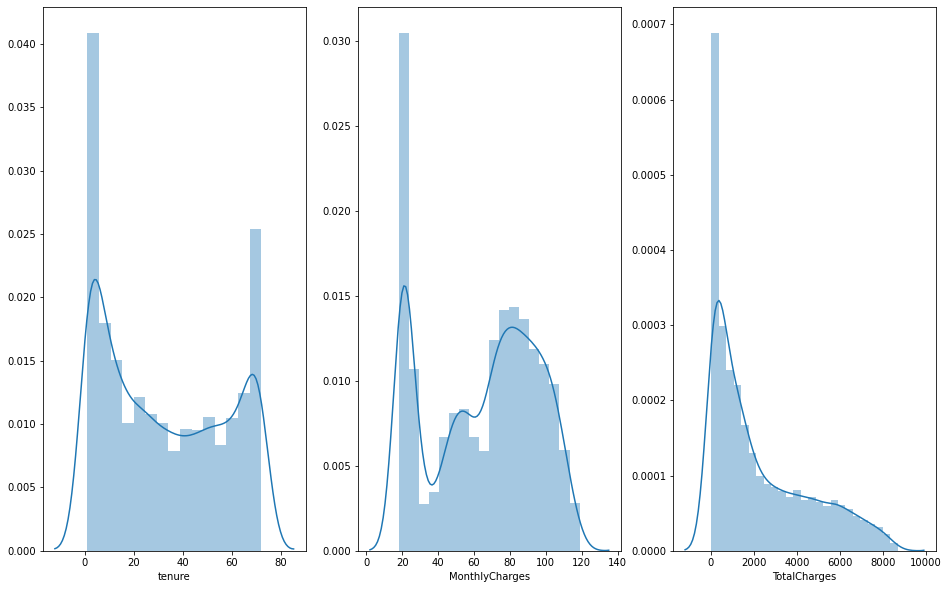

In [46]:
#The columns 'tenure', 'MonthlyCharges', 'TotalCharges' needs to be scaled.
#Checking whether the data of these variables follows a Gaussian distribution or not.

plt.figure(figsize=(16,10))
plt.subplot(1,3,1)
sns.distplot(df.tenure)
plt.subplot(1,3,2)
sns.distplot(df.MonthlyCharges)
plt.subplot(1,3,3)
sns.distplot(df.TotalCharges)
plt.show()

In [47]:
#If the data doesn't follow Gaussian distribution MinMaxScaler(Normalization) must be used. But in the course StandardScaler is used.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train[['tenure', 'MonthlyCharges', 'TotalCharges']]=scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [48]:
y_train.head()

879     0
5790    0
6498    1
880     1
2784    1
Name: Churn, dtype: int64

In [49]:
#Checking if there is a major bias in Churn in test data
churn_rate= (y_train.sum())/(y_train.shape[0])
churn_rate

0.26147907354733846

Churn rate is 26%

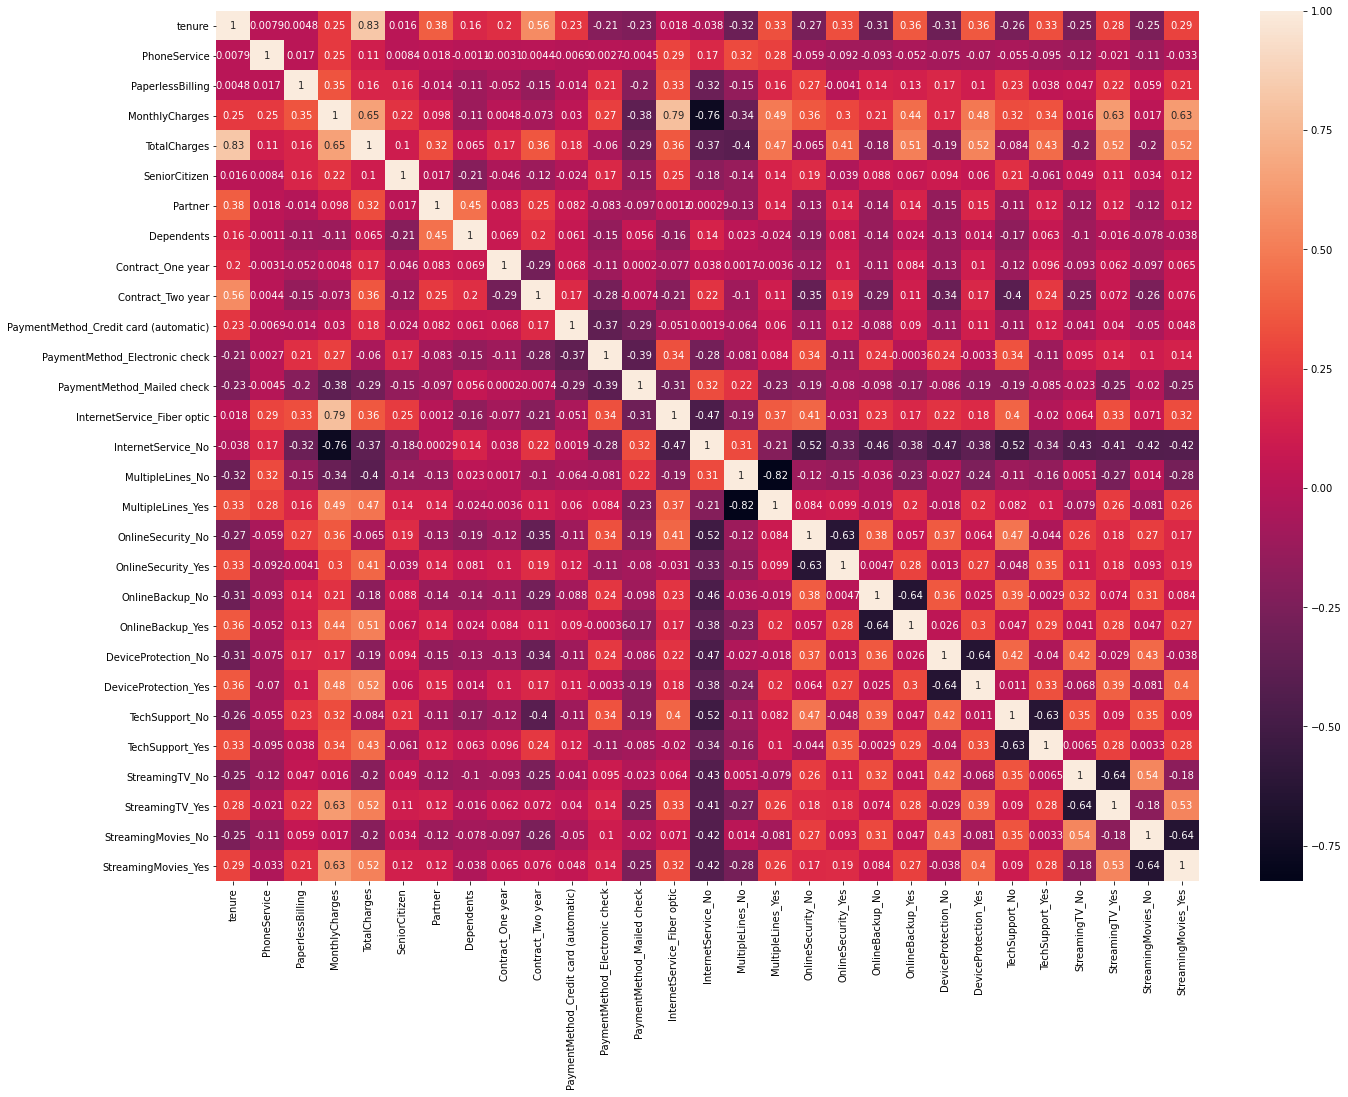

In [50]:
#Checking correlation.
plt.figure(figsize=(22,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [51]:
#Dropping high corelated values.

X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

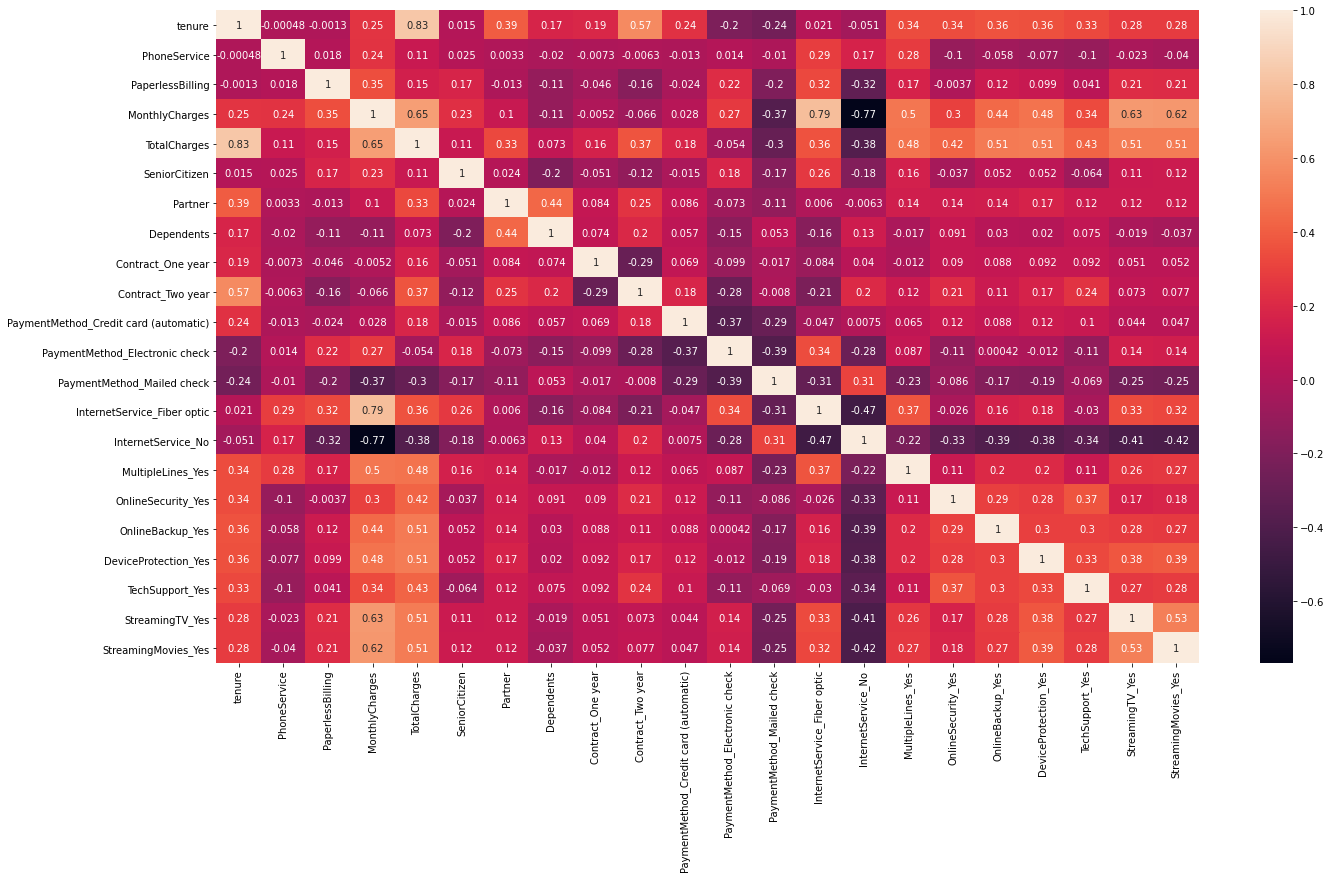

In [52]:
plt.figure(figsize=(22,12))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [53]:
y_train.head()

879     0
5790    0
6498    1
880     1
2784    1
Name: Churn, dtype: int64

In [54]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,0,1,0,0,0,0,1,1,1,1


### Building the model

#### 1st Model

In [55]:
import statsmodels.api as sm
lr_model=sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
lr_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.8
Date:                Mon, 01 Feb 2021   Deviance:                       4009.6
Time:                        23:58:34   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9598      1.545     -2.563      0.010      -6.988      -0.931
tenure                                   -1.5174      0.189     -8.017      0.000      -1.888      -1.146
PhoneService                              0.9519      0.789      1.207      0.227      -0.594       2.498
PaperlessBilling                          0.3258      0.090      3.618      0.000       0.149       0.502
MonthlyCharges                           -2.1835      1.160     -1.883      0.060      -4.456       0.089
TotalCharges                              0.7325      0.198      3.702      0.000       0.345       1.120
SeniorCitizen                             0.3987      0.102      3.927      0.000       0.200       0.598
Partner                                   0.0372      0.094      0.397      0.691      -0.146       0.221
Dependents                               -0.1428      0.107     -1.331      0.183      -0.353       0.068
Contract_One year                        -0.6575      0.129     -5.104      0.000      -0.910      -0.405
Contract_Two year                        -1.2456      0.212     -5.875      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2582      0.137     -1.887      0.059      -0.526       0.010
PaymentMethod_Electronic check            0.1608      0.113      1.428      0.153      -0.060       0.381
PaymentMethod_Mailed check               -0.2549      0.137     -1.855      0.064      -0.524       0.014
InternetService_Fiber optic               2.5162      0.967      2.603      0.009       0.622       4.411
InternetService_No                       -2.7808      0.981     -2.833      0.005      -4.704      -0.857
MultipleLines_Yes                         0.5624      0.214      2.629      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0224      0.216     -0.104      0.917      -0.446       0.401
OnlineBackup_Yes                          0.1754      0.212      0.829      0.407      -0.239       0.590
DeviceProtection_Yes                      0.3230      0.215      1.502      0.133      -0.098       0.744
TechSupport_Yes                          -0.0299      0.216     -0.138      0.890      -0.454       0.394
StreamingTV_Yes                           0.9609      0.396      2.426      0.015       0.185       1.737
StreamingMovies_Yes                       0.8496      0.396      2.146      0.032       0.074       1.625
=========================================================================================================
"""